In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from perceptron import Perceptron

In [3]:
data = pd.read_csv("input/weatherHistory.csv")
data = data[['Formatted Date', 'Temperature (C)']]
data['Date'] = pd.to_datetime(data['Formatted Date'], yearfirst=True, utc=True)
data['Date_day'] = data['Date'].map(lambda date: f'{date.year}-{date.month}-{date.day}')
data = data.sort_values(by=['Date'], ascending=True).reset_index()

data.head()

,index,Formatted Date,Temperature (C),Date,Date_day
0,2880,2006-01-01 00:00:00.000 +0100,0.577778,2005-12-31 23:00:00+00:00,2005-12-31
1,2881,2006-01-01 01:00:00.000 +0100,1.161111,2006-01-01 00:00:00+00:00,2006-1-1
2,2882,2006-01-01 02:00:00.000 +0100,1.666667,2006-01-01 01:00:00+00:00,2006-1-1
3,2883,2006-01-01 03:00:00.000 +0100,1.711111,2006-01-01 02:00:00+00:00,2006-1-1
4,2884,2006-01-01 04:00:00.000 +0100,1.183333,2006-01-01 03:00:00+00:00,2006-1-1


In [4]:
data_day = data.groupby(['Date_day'])['Temperature (C)'].mean().reset_index()
data_day['Date'] = pd.to_datetime(data_day['Date_day'], yearfirst=True)
data_day = data_day.sort_values(by=['Date'], ascending=True).reset_index()
data_day['My_Date_Day'] = data_day['Date'].map(lambda date: f"{30 * (date.month - 1) + date.day}")
data_day['My_Date_Month_Day'] = data_day['Date'].map(lambda date: f"{date.month}-{date.day}")

data_day.head()

,index,Date_day,Temperature (C),Date,My_Date_Day,My_Date_Month_Day
0,0,2005-12-31,0.577778,2005-12-31,361,12-31
1,1,2006-1-1,4.075000,2006-01-01,1,1-1
2,12,2006-1-2,5.263194,2006-01-02,2,1-2
3,23,2006-1-3,2.340509,2006-01-03,3,1-3
4,26,2006-1-4,2.251852,2006-01-04,4,1-4


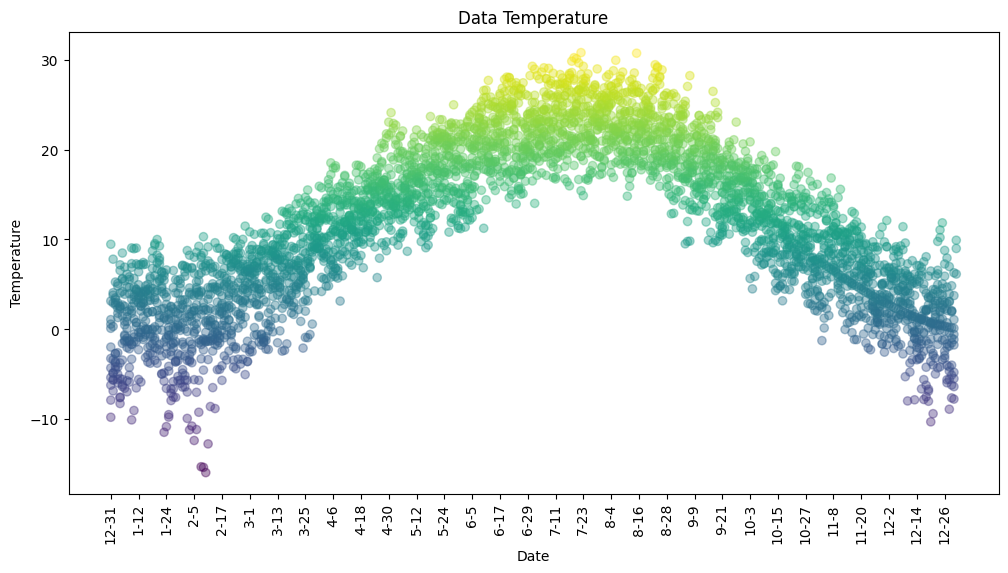

In [5]:
plt.figure(figsize=(12, 6))

plt.scatter(data_day['My_Date_Month_Day'].to_numpy(), data_day['Temperature (C)'].to_numpy(), alpha=.4,
            c=data_day['Temperature (C)'])
plt.title("Data Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.xticks(rotation="vertical")
plt.xticks(np.arange(0, 365, 12))
plt.show()

In [6]:
X = data_day['My_Date_Day'].copy().to_numpy(int)
Y = data_day['Temperature (C)'].copy().values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [8]:
model = Perceptron(1, learning_rate=0.00003, function="linear")
train_losses, train_accuracies, test_losses, test_accuracies = model.fit(X_train, Y_train, X_test, Y_test, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:08<00:00,  5.87it/s]


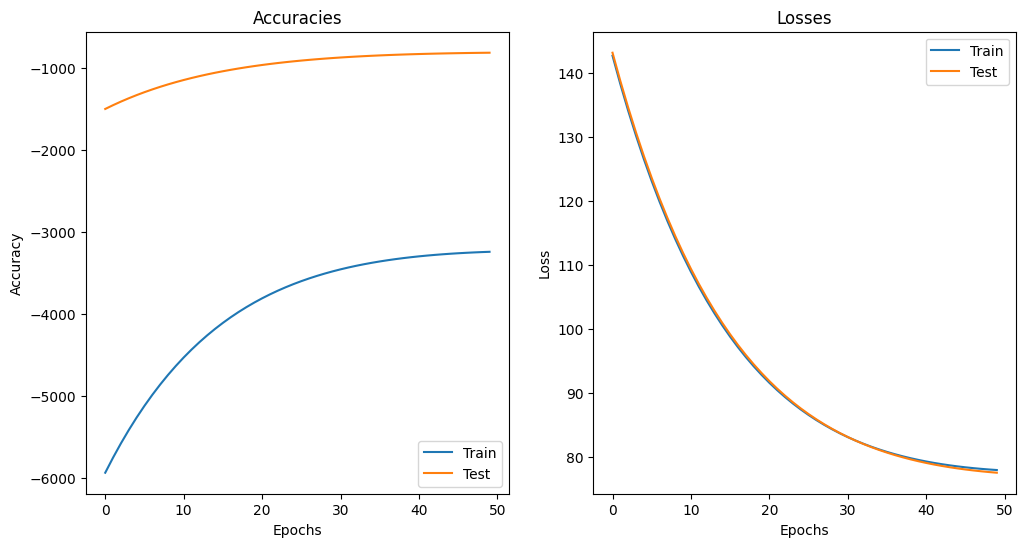

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(train_accuracies)
ax1.plot(test_accuracies)
ax1.set_title("Accuracies")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(['Train', 'Test'])

ax2.plot(train_losses)
ax2.plot(test_losses)
ax2.set_title("Losses")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(['Train', 'Test'])

plt.show()

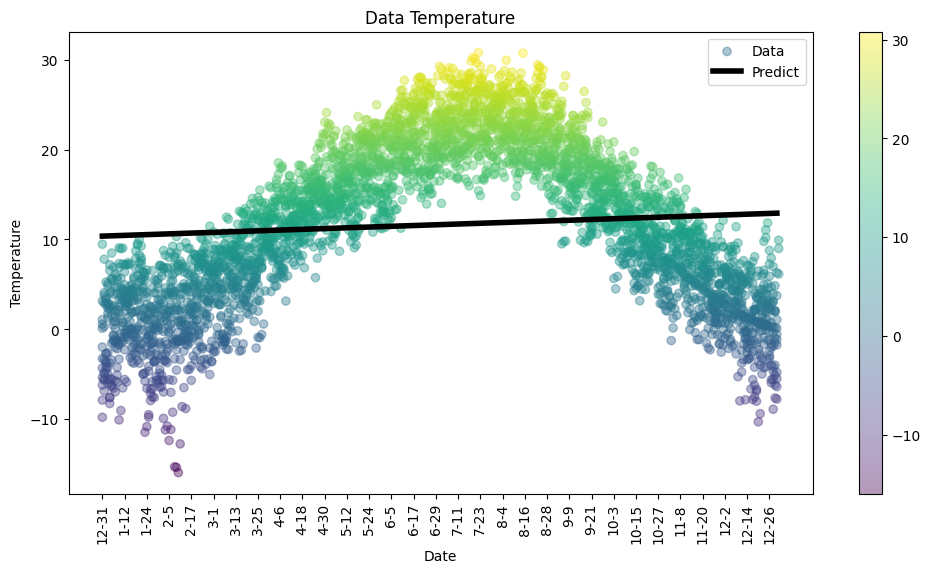

In [10]:
plt.figure(figsize=(12, 6))

plt.scatter(data_day['My_Date_Month_Day'].to_numpy(), data_day['Temperature (C)'].to_numpy(), alpha=.4,
            c=data_day['Temperature (C)'])
plt.plot(model.weights[0] * range(365) + model.bias[0], c="black", linewidth=4)
plt.colorbar()
plt.title("Data Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.xticks(rotation="vertical")
plt.xticks(np.arange(0, 365, 12))
plt.legend(['Data', 'Predict'])
plt.show()

In [11]:
def predict(year_day_number: int) -> float:
    y_pred = model.predict([year_day_number])[0, 0]
    return y_pred

In [12]:
new_day = 22
print(predict(new_day))

10.530517587452907


In [13]:
np.save("weight_weights.npy", model.weights[0])
np.save("weight_bias.npy", model.bias[0])